# Darians Work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
df1 = pd.read_csv('Data/bom.movie_gross.csv.gz')

## Cleaning 

In [2]:
# cleaning for Domestic & Worldwide Revenue
# remove dollar signs
df.production_budget = df.production_budget.replace('\$','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\$','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\$','', regex = True)

# remove commas
df.production_budget = df.production_budget.replace('\,','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\,','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\,','', regex = True)

df.worldwide_gross = df.worldwide_gross.astype('int')
df.domestic_gross = df.domestic_gross.astype('int')
df.production_budget = df.production_budget.astype('int')

df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
df = df[(df['release_date'].dt.year >= 1988) & (df['release_date'].dt.year <= 2018)]

# drop movie title because it's not relevant to this analysis
df = df.drop(['movie'], axis=1)

# some rows had an impossible value (0) so I dropped those
df = df[(df != 0).all(1)]

df['release_date'] = pd.to_datetime(df.release_date, format='%y', errors='coerce').dt.year
df.sort_values(by='release_date')
df = df.groupby('release_date').sum().reset_index()

In [3]:
# Cleaning for Top 10 Competitors 
df1.isna().sum()
df1.dropna(inplace=True)
df1.drop(['foreign_gross'], axis=1, inplace=True)

df1.year = df1.year.astype('str')
df1['year'] =  pd.to_datetime(df1['year'], infer_datetime_format=True)

# we chose to only look at competitors over the last 5 years so we eliminated anything before 2013
df1 = df1[(df1['year'].dt.year >= 2013)]

df1 = df1.groupby('studio').sum().reset_index()
df1 = df1.sort_values('domestic_gross', ascending=False)
df1 = df1.reset_index()
df1 = df1[0:10]

## Plotting

(0.0, 30000000000)

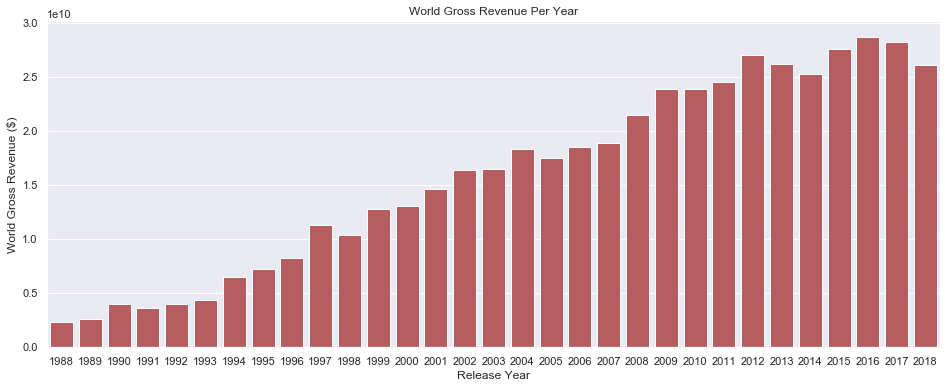

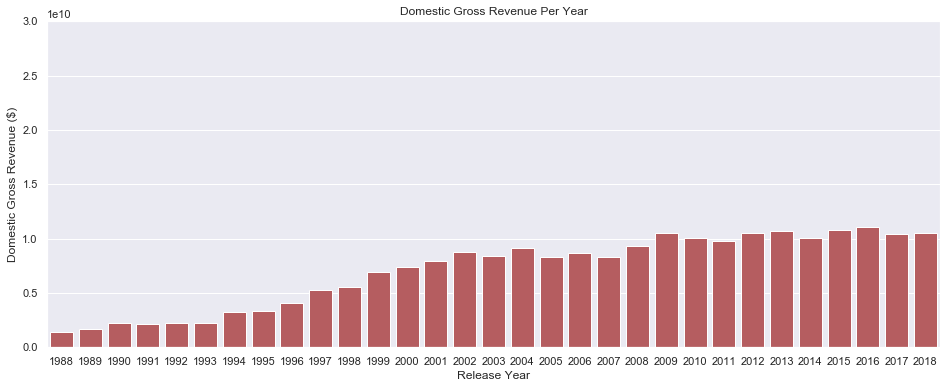

In [9]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="worldwide_gross", data=df, color="r")
plt.xlabel('Release Year')
plt.ylabel('World Gross Revenue ($)') 
plt.title('World Gross Revenue Per Year')


plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="domestic_gross", data=df, color="r")
plt.xlabel('Release Year')
plt.ylabel('Domestic Gross Revenue ($)')
plt.title('Domestic Gross Revenue Per Year')
plt.ylim(top=30000000000)

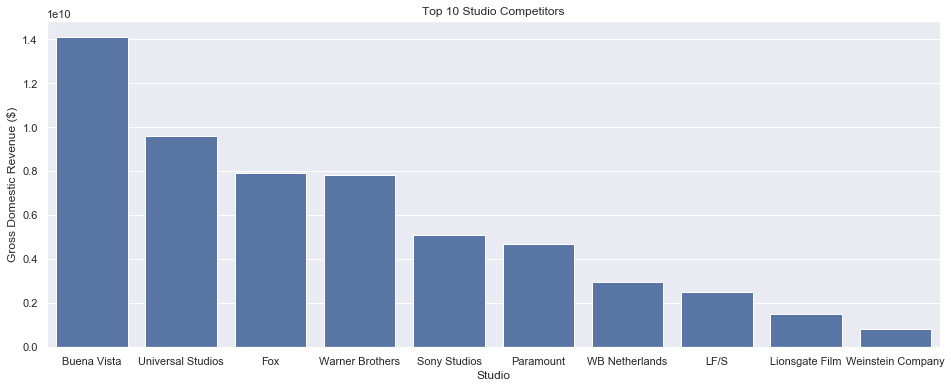

In [19]:
plt.figure(figsize=(16, 6))
ax1 = sns.barplot(x="studio", y="domestic_gross", data=df1, color="b")
plt.xlabel('Studio')
plt.ylabel('Gross Domestic Revenue ($)') # highest value is $14,000,000,000
plt.title('Top 10 Studio Competitors')
sns.set(style='darkgrid')
plt.xticks(range(10), ['Buena Vista', 'Universal Studios', 'Fox', 'Warner Brothers', 'Sony Studios', 'Paramount','WB Netherlands','LF/S','Lionsgate Film','Weinstein Company']);

## Recommendations

1. Over the last 30 years, movies have increasingly generate more revenue both domestically and worldwide. However, since worldwide growth is faster, we reccomend not neglecting foreign market releases.

2. Model your studio practices after one of the top 5 movie studios. Alternatively, comission a longer study that investigstes why these studios are successfull (director, budget, etc)